In [37]:
from collections import Counter
from itertools import combinations

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

In [3]:
style = plt.style.use('../config/paper_protein_content.mplstyle')

In [4]:
data = pd.read_excel('../results/datasets_calculations.xlsx')

In [5]:
data.head()

,object,study,code,method,n_proteins,n_assigned_proteins,assigned_percent,assigned_copies_percent,total_copies_per_cell,total_copies_per_um3,core_input,core_copies_percent_n0,core_copies_percent_n1
0,ecoli,taniguchi2010,TA10,FL,1018,1015,99.71,100.00,94571,43987,True,0.739465,0.871640
1,ecoli,valgepea2013,VA13,MS,1179,1179,100.00,100.00,4293284,1996876,True,0.877605,0.973178
2,ecoli,li2014,LI14,RP,3883,3587,92.38,95.18,5627623,2617499,True,0.759078,0.866133
3,ecoli,wisniewski2014,WI14,MS,2261,2228,98.54,96.88,1321542,614671,True,0.793106,0.902692
4,ecoli,soufi2015,SO15,MS,1913,1912,99.95,100.00,11214979,5216269,True,0.799098,0.925206


In [7]:
method_color_dict = {'MS': 'C0', 'FL': 'C2', 'RP': 'C4', 'WB': 'C1', 'SRM': 'C9'}

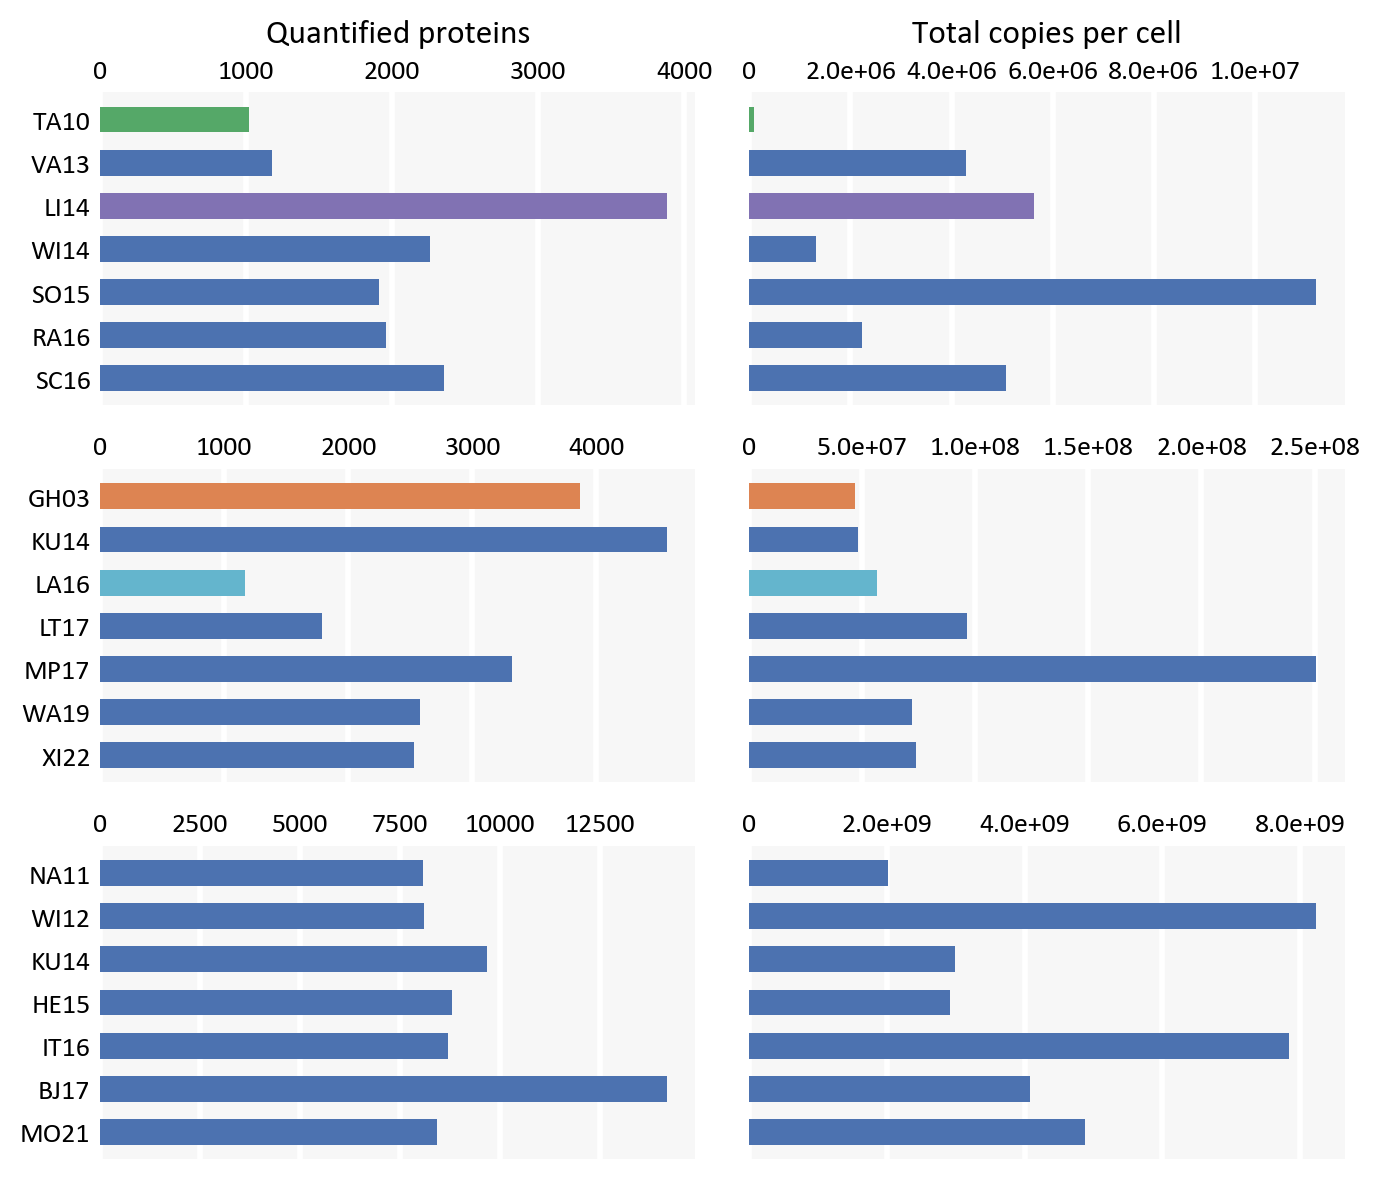

In [9]:
fig, axes = plt.subplots(3,2, figsize=(7,6), dpi=200, sharey='row', layout='tight')

for i, j in enumerate(data['object'].unique()):
    object_data_gen = data[data['object'] == j].set_index('code')
    
    object_colors = object_data_gen['method'][::-1].map(method_color_dict).values
    
    axes[i, 0].barh(y=range(len(object_data_gen)), 
                    width=object_data_gen['n_proteins'][::-1], 
                    height=0.6, 
                    color=object_colors)
    
    axes[i, 0].set(yticks=range(len(object_data_gen)), yticklabels=object_data_gen.index[::-1])
    axes[i, 0].grid(visible=False, axis='y')
    axes[i, 0].xaxis.tick_top()
    
    axes[i, 1].barh(y=range(len(object_data_gen)), 
                    width=object_data_gen['total_copies_per_cell'][::-1], 
                    height=0.6, 
                    color=object_colors)
    
    axes[i, 1].xaxis.set_major_formatter(lambda x, pos: 0 if x == 0.0 else f'{x:.1e}')
    axes[i, 1].grid(visible=False, axis='y')
    axes[i, 1].xaxis.tick_top()
    
    if i == 0:
        axes[i, 0].set_title('Quantified proteins',)
        axes[i, 1].set_title('Total copies per cell')
                
plt.savefig('../results/graphs/graph_1_total_protein_copies.png', bbox_inches='tight')

In [ ]:
title_dict = {'ecoli': 'E. coli',
              'scerevisiae': 'S. cerevisiae',
              'hela': 'HeLa'}

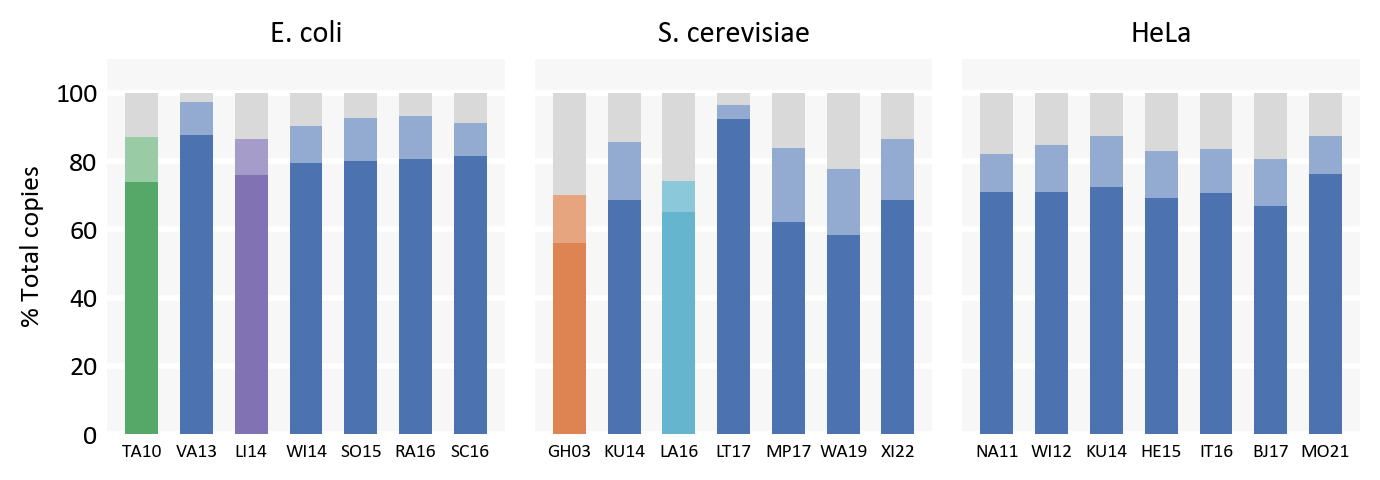

In [32]:
fig, axes = plt.subplots(1,3, figsize=(7,2.5), dpi=200, layout='tight', sharey=True)

for i, j in enumerate(data['object'].unique()):
    object_data_gen = data[data['object'] == j].set_index('code')
    
    object_colors = object_data_gen['method'].map(method_color_dict).values
    object_colors_light = [sns.set_hls_values(i, l=0.7) for i in object_colors]
    
    axes[i].bar(x=range(len(object_data_gen)), height=100, width=0.6, color=sns.set_hls_values(sns.color_palette('deep')[7], l=0.85))
    axes[i].bar(x=range(len(object_data_gen)), height=object_data_gen['core_copies_percent_n1']*100, width=0.6, color=object_colors_light, label='Core - 1')
    axes[i].bar(x=range(len(object_data_gen)), height=object_data_gen['core_copies_percent_n0']*100, width=0.6, color=object_colors, label='Core')
    
    if i == 0:
        axes[i].set_ylabel('% Total copies')
        
    axes[i].set(xticks=range(len(object_data_gen)), ylim = [0,110])
    axes[i].set_xticklabels(object_data_gen.index, fontsize=7)
    axes[i].grid(visible=False, axis='x')
    axes[i].set_title(title_dict[j], fontsize=11)
    
plt.savefig('../results/graphs/graph_2_core_percent.png', bbox_inches='tight')

In [40]:
data_untargeted = data[~data['code'].isin(['TA10', 'GH03', 'LA16'])]

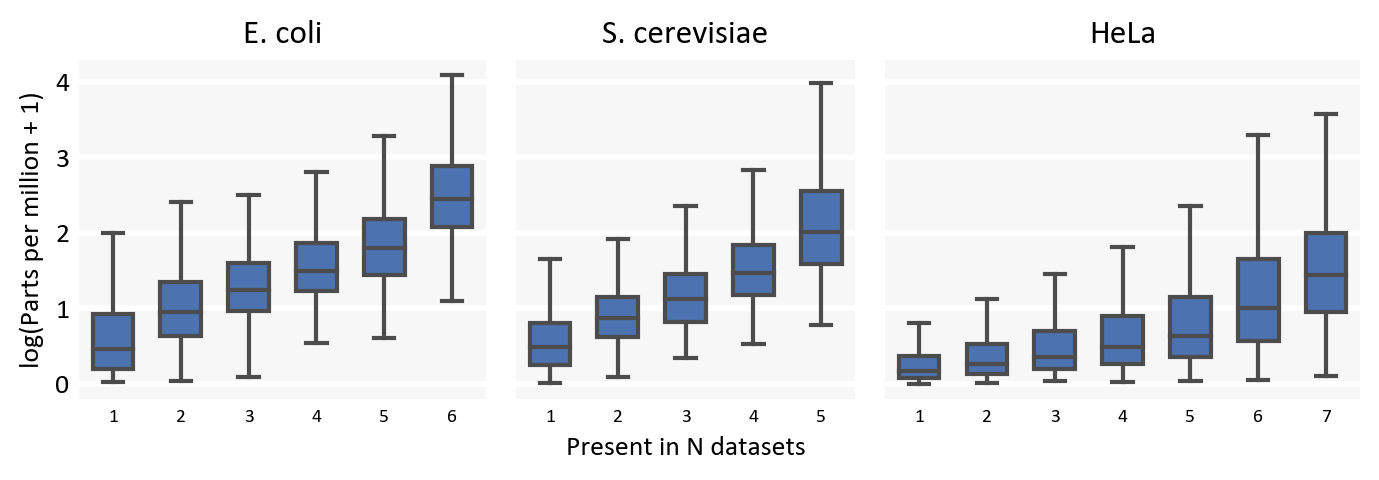

In [51]:
fig, axes = plt.subplots(1,3, figsize=(7,2.5), dpi=200, layout='tight', sharey=True, gridspec_kw={'width_ratios': data_untargeted.groupby('object').size().iloc[[0,2,1]]})

for i, j in enumerate(data_untargeted['object'].unique()):
    studies_object = data_untargeted.loc[data_untargeted['object'] == j, 'study']
    
    cores_object = pd.read_excel(f'../results/{j}_cores.xlsx')
    
    sns.boxplot(data=[np.log10(cores_object.loc[cores_object['n_datasets'] == k, 'parts_per_mil'] + 1) for k in range(1, len(studies_object)+1)], ax=axes[i], showfliers=False, color='C0', width=0.6, saturation=1.0)
    
    axes[i].grid(visible=False, axis='x')
    axes[i].set_xticks(range(len(studies_object)))
    
    axes[i].set_xticklabels([str(i) for i in range(1, len(studies_object)+1)], fontsize=7)
    axes[i].set_title(title_dict[j])
    
    axes[0].set_ylabel('log(Parts per million + 1)')
    axes[1].set_xlabel('Present in N datasets')

plt.savefig('../results/graphs/graph_3_core_expression.png', bbox_inches='tight')

In [ ]:
#Cores - 1

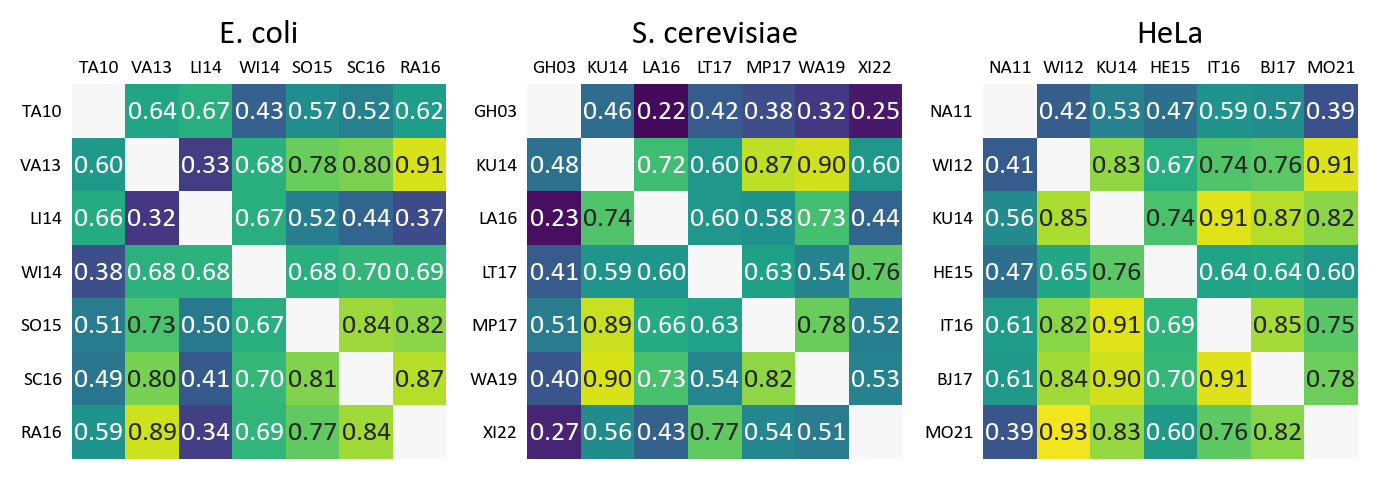

In [59]:
fig, axes = plt.subplots(1,3, figsize=(7,2.5), dpi=200, layout='tight')

for i, j in enumerate(data['object'].unique()):
    object_corr = pd.read_excel(f'../results/correlation_{j}.xlsx', index_col=0)
    object_corr.index = object_corr.index.map(data[data['object'] == j].set_index('study')['code'])
    object_corr.columns = object_corr.columns.map(data[data['object'] == j].set_index('study')['code'])
    
    sns.heatmap(ax=axes[i], data=object_corr, cmap='viridis', annot=True, fmt='.2f', vmin=0.2, vmax=0.95, cbar=False, square=True)
    axes[i].set_yticklabels(labels=axes[i].get_yticklabels(), rotation=0, fontsize=7)
    axes[i].set_xticklabels(labels=axes[i].get_xticklabels(), rotation=0, fontsize=7)
    axes[i].xaxis.tick_top()
    
    axes[i].set_title(title_dict[j])
    
plt.savefig('../results/graphs/graph_4_correlations.png', bbox_inches='tight')

TypeError: Invalid shape (1,) for image data

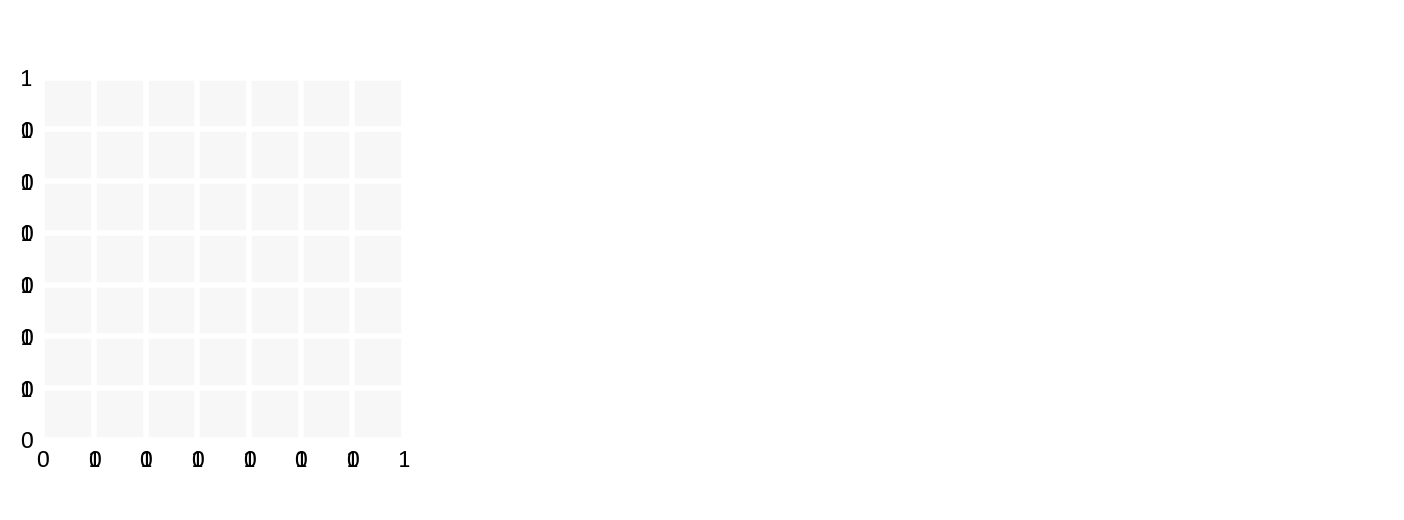

In [195]:
from itertools import combinations

fig = plt.figure(figsize=(7, 2.4), dpi=200)
subfigs = fig.subfigures(1, 3, wspace=0.01)

for i, j in enumerate(data['object'].unique()):
    axes = subfigs[i].subplots(7, 7, sharey='row', sharex='col', gridspec_kw={'hspace': 0, 'wspace': 0})
    
    for j, i in enumerate(axes.ravel()):
        if j == 0:
            i.imshow(np.array([0.9]), cmap='viridis')
            
        i.grid(visible=False, axis='both')
        i.set_xticklabels([])
        i.set_yticklabels([])

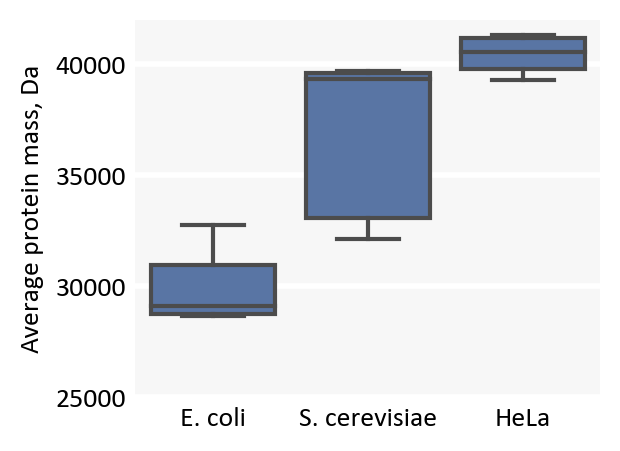

In [73]:
fig, axes = plt.subplots(figsize=(3, 2.5), dpi=200)

avg_mass = [[], [], []]

for k, o in enumerate(data_untargeted['object'].unique()):
    studies_object = data_untargeted.loc[data_untargeted['object'] == o, 'study']
    proteome = pd.read_excel(f'../data/processed/proteomes/{o}_proteome.xlsx')
    proteome = proteome.set_index('uniprot_id')['mass']
    
    datasets_object = [pd.read_excel(f'../data/processed/{o}/{i}_processed.xlsx') for i in studies_object]
    
    for i in datasets_object:
        i = i[i['assigned_id'] != '_other']
        masses = i['assigned_id'].map(proteome)
        avg_mass[k].append((i['copies_per_cell'] * masses).sum() / i['copies_per_cell'].sum())
        
sns.boxplot(ax=axes, data=avg_mass, color='C0', showfliers=False)

axes.set_ylim([25000, 42000])
axes.set_ylabel('Average protein mass, Da')
axes.set_xticklabels(title_dict.values())

plt.savefig('../results/graphs/graph_5_protein_mass.png', bbox_inches='tight')

In [96]:
avg_mass = [np.median(i) for i in avg_mass]

In [98]:
avg_mass = np.array(avg_mass)

In [97]:
avg_mass

[29092.33037382952, 39328.54952037543, 40554.642596209706]

In [103]:
milo_per_cell = np.divide(np.array([0.280, 5.6, 300]) * (6*10**23) * (10**(-12)), avg_mass)

In [104]:
milo_per_cell

array([5774717.866916812, 85434119.51308405, 4438456079.916804],
      dtype=object)

In [106]:
np.divide(milo_per_cell, np.array([2.15, 42.0, 2800]))

array([2685915.286938052, 2034145.7026924775, 1585162.8856845729],
      dtype=object)

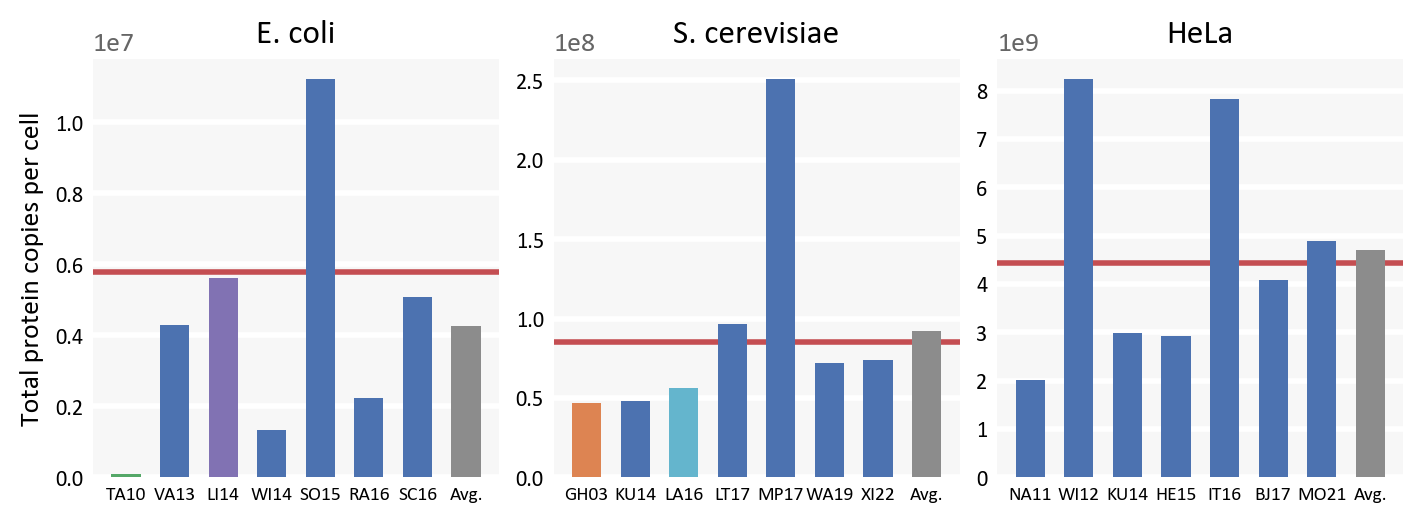

In [110]:
fig, axes = plt.subplots(1,3, figsize=(7,2.5), dpi=200, layout='constrained')

for i, j in enumerate(data['object'].unique()):
    object_data_gen = data[data['object'] == j].set_index('code')
    
    object_colors = np.append(object_data_gen['method'].map(method_color_dict).values, 'C7') 
    
    axes[i].axhline(milo_per_cell[i], color='C3', zorder=1, linewidth=2, label='Milo')
    
    axes[i].bar(x=range(len(studies_object)+1), 
                height=np.append(object_data_gen['total_copies_per_cell'], object_data_gen['total_copies_per_cell'].mean()), 
                width=0.6, 
                color=object_colors, 
                zorder=2)

    axes[i].grid(visible=False, axis='x')
    axes[i].set_xticks(range(len(studies_object)+1))
    axes[i].set_xticklabels(list(object_data_gen.index) + ['Avg.'], fontsize=7)
    axes[i].tick_params(axis='y', which='major', labelsize=8)
    axes[i].set_title(title_dict[j])
    axes[0].set_ylabel('Total protein copies per cell')

plt.savefig('../results/graphs/graph_6_total_milo_comparison.png', bbox_inches='tight')

In [113]:
ribosomes = [22000, 187000, 4*10**6]

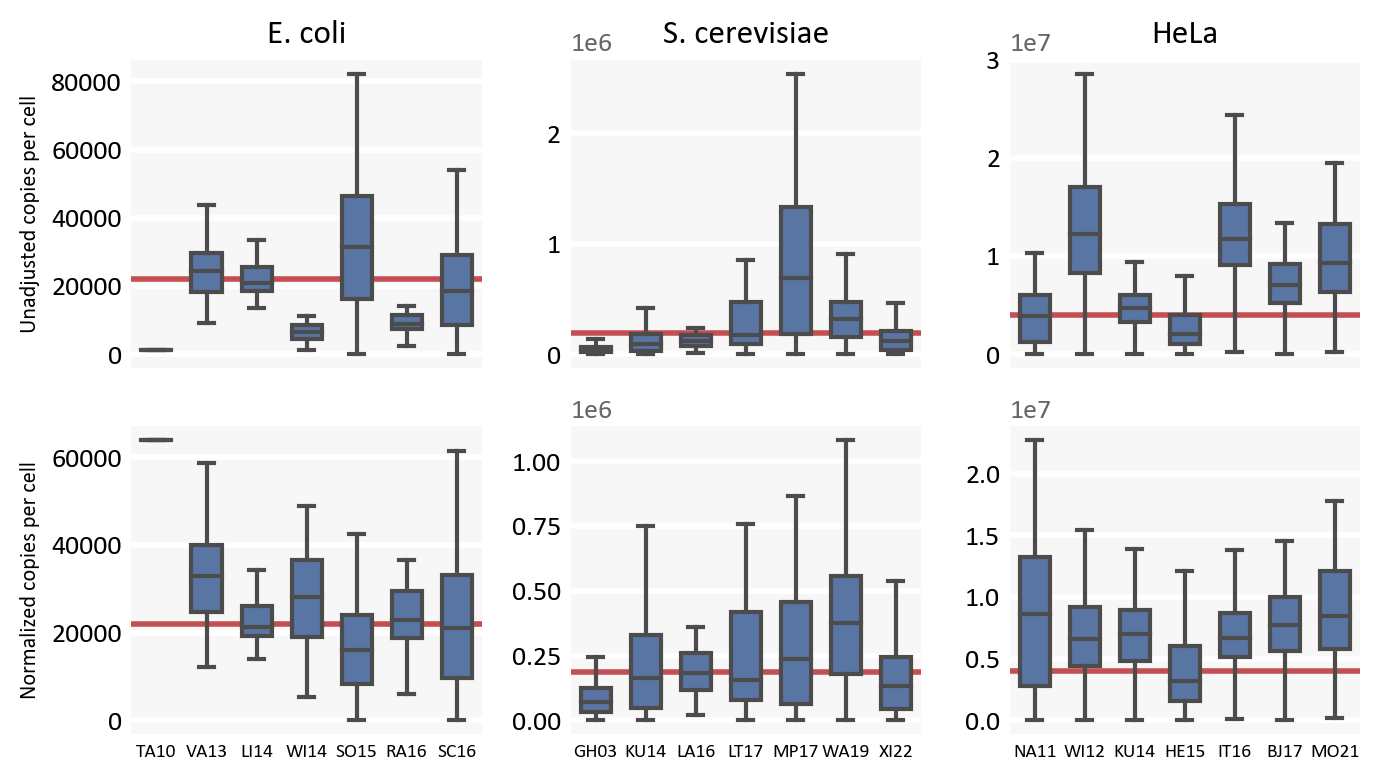

In [122]:
fig, ax = plt.subplots(2,3, figsize=(7,4), dpi=200, layout='tight', sharex='col')

ax[0,0].set_ylabel('Unadjusted copies per cell', fontsize=8)

for k, o in enumerate(data['object'].unique()):
    studies_object = data.loc[data['object'] == o, 'study']
    
    object_colors = object_data_gen['method'].map(method_color_dict).values
    
    datasets_object = [pd.read_excel(f'../data/processed/{o}/{i}_processed.xlsx') for i in studies_object]
    ribosomes_object = pd.read_excel(f'../data/processed/ribosomes/{o}_ribosome.xlsx')['uniprot_id']
    copies_object = []
    copies_r_object = []
    
    for i in datasets_object:
        copies_r_object.append(i[i['assigned_id'].isin(ribosomes_object)]['copies_per_cell'].to_numpy())
    
    ax[0,k].axhline(ribosomes[k], color='C3', zorder=0, linewidth=2, label='N ribosomes')
    sns.boxplot(ax=ax[0,k], data=copies_r_object, showfliers=False, width=0.6, zorder=2, palette=object_colors)
    
    ax[0,k].set_xticklabels([])
    #ax[0,k].legend(loc='upper right')
    ax[0,k].set_title(title_dict[o])
    ax[0,k].grid(False, axis='x')
    
ax[1,0].set_ylabel('Normalized copies per cell', fontsize=8)

for k, o in enumerate(data['object'].unique()):
    studies_object = data.loc[data['object'] == o, 'study']
    
    object_colors = object_data_gen['method'].map(method_color_dict).values
    codes_object = data.loc[data['object'] == o, 'code']
    
    datasets_object = [pd.read_excel(f'../data/processed/{o}/{i}_processed.xlsx') for i in studies_object]
    ribosomes_object = pd.read_excel(f'../data/processed/ribosomes/{o}_ribosome.xlsx')['uniprot_id']
    copies_r_object = []
    
    for i in datasets_object:
        copies_r_object.append(i[i['assigned_id'].isin(ribosomes_object)]['copies_per_cell'].to_numpy() * (milo_per_cell[k] / i['copies_per_cell'].sum()))
    
    ax[1,k].axhline(ribosomes[k], color='C3', zorder=0, linewidth=2, label='N ribosomes')
    sns.boxplot(ax=ax[1,k], data=copies_r_object, showfliers=False, width=0.6, zorder=2, palette=object_colors)
    
    ax[1,k].set_xticks(range(len(studies_object)))
    ax[1,k].set_xticklabels(codes_object, fontsize=7)
    #ax[1,k].legend(loc='upper right')
    ax[1,k].grid(False, axis='x')
    
plt.savefig('../results/graphs/graph_7_ribosome_numbers.png', bbox_inches='tight')